In [76]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
df=pd.read_csv('F:/Uni of Kent/machine learning assignment/sales_data.csv')

In [78]:
df.head()

,Date,Sales
0,2005-01-01,10827
1,2005-02-01,12049
2,2005-03-01,18298
3,2005-04-01,17834
4,2005-05-01,16480


In [79]:
# Cleaning up the data as the we have monthly sales of compact crane product for the forecast
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,2005-01-01,10827
1,2005-02-01,12049
2,2005-03-01,18298
3,2005-04-01,17834
4,2005-05-01,16480


In [80]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [81]:
#indexing w.r.t the month
df.set_index('Month',inplace=True)

In [82]:
df.describe()

,Sales
count,153.000000
mean,20284.915033
std,6370.759660
min,7709.000000
25%,16662.000000
50%,18955.000000
75%,23006.000000
max,45061.000000


<AxesSubplot:xlabel='Month'>

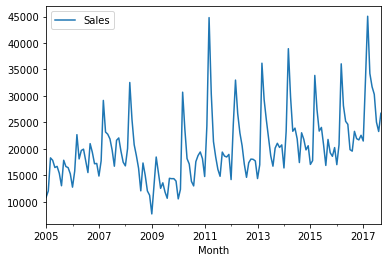

In [83]:
df.plot()

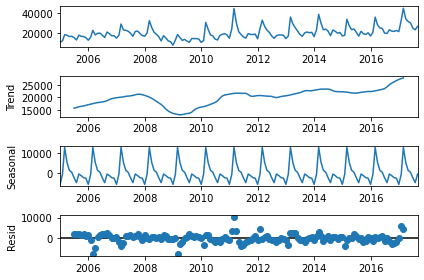

In [84]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df,model='additive')
fig = decomposition.plot()

C:\Users\DEll\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


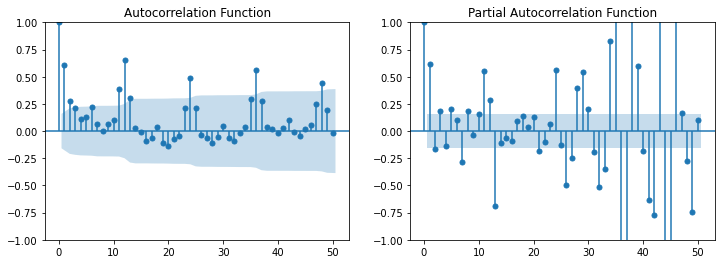

In [85]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))  # create a figure with 2 subplots

plot_acf(df['Sales'], lags=50, ax=ax[0])  # plot ACF on the first subplot
ax[0].set_title('Autocorrelation Function')

plot_pacf(df['Sales'], lags=50, ax=ax[1])  # plot PACF on the second subplot
ax[1].set_title('Partial Autocorrelation Function')

plt.show()

In [86]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Sales'])

In [87]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Sales'])

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [88]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.2852168563620376
p-value : 0.6359081904491787
#Lags Used : 13
Number of Observations Used : 139
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [89]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)
df.head(14)

,Sales,Seasonal First Difference
Month,,
2005-01-01,10827,NaN
2005-02-01,12049,NaN
2005-03-01,18298,NaN
2005-04-01,17834,NaN
2005-05-01,16480,NaN
2005-06-01,16690,NaN
2005-07-01,15389,NaN
2005-08-01,13031,NaN
2005-09-01,17849,NaN


In [90]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.349426746645128
p-value : 0.00036435978574339404
#Lags Used : 11
Number of Observations Used : 129
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

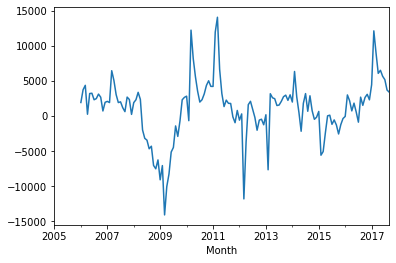

In [91]:
#however the pattern doesnt seem that stationary but as the adf test static has been proven to be stationary so moving with
#analysis of the time series
df['Seasonal First Difference'].plot()

In [92]:
len(df)

153

In [93]:
split_index=int(len(df)*0.67)
train=df[:split_index]
test=df[split_index:]
(len(train),len(test))

(102, 51)

In [94]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\DEll\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


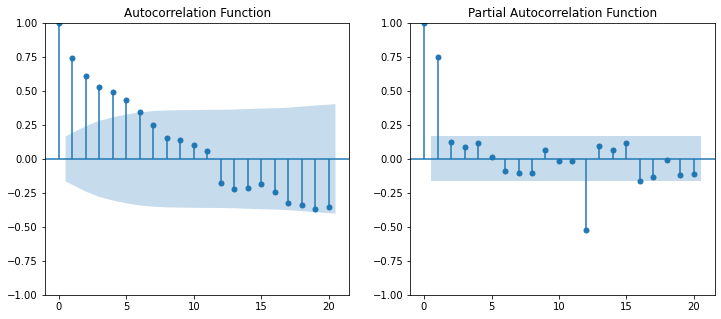

In [95]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the ACF on the first subplot
sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:], lags=20, ax=ax1)
ax1.set_title('Autocorrelation Function')

# Plot the PACF on the second subplot
sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=20, ax=ax2)
ax2.set_title('Partial Autocorrelation Function')

# Display the figure
plt.show()

In [96]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

In [98]:
endog = df['Sales']
final_model = SARIMAX(endog, order=(1,1,1), seasonal_order=(1,1,0,12))
final_fitted = final_model.fit()

C:\Users\DEll\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DEll\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [99]:
final_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                  153
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood               -1304.925
Date:                             Sun, 07 May 2023   AIC                           2617.849
Time:                                     19:24:16   BIC                           2629.616
Sample:                                 01-01-2005   HQIC                          2622.631
                                      - 09-01-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3448      0.238      1.447      0.148      -0.122       0.812
ma.L1         -0.6319      0.189     -3.348      0.001      -1.002      -0.262
ar.S.L12      -0.3262      0.067     -4.887      0.000      -0.457      -0.195
sigma2      8.207e+06   7.17e+05     11.449      0.000     6.8e+06    9.61e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                82.36
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.24
Prob(H) (two-sided):                  0.69   Kurtosis:                         6.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [100]:
# Make predictions on the test data
predictions = final_fitted.predict(start=103, end=153)

# Extract the actual values from the test data
actual_values = test['Sales'].values

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(actual_values, predictions))

In [101]:
rmse

5555.498170908286

<AxesSubplot:xlabel='Month'>

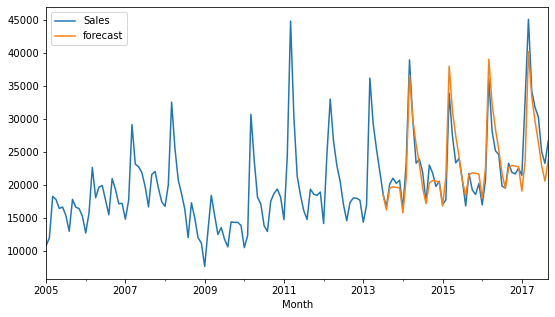

In [102]:
df['forecast']=final_fitted.predict(start=102,end=153,dynamic=True)
df[['Sales','forecast']].plot(figsize=(9,5))

In [59]:
from sklearn.metrics import mean_squared_error
import numpy as np
import statsmodels.api as sm

In [60]:
import itertools

p = range(0, 4)
q = range(0, 4)
d = range(0, 2)
P = range(0, 4)
Q = range(0, 4)
D = range(0, 2)
s = 12  # seasonal period

In [61]:
# create list of all possible combinations of SARIMA parameters
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, [s]))
param_combinations = list(itertools.product(pdq, seasonal_pdq))

In [ ]:
param_combinations

In [63]:
len(param_combinations)

1024

In [64]:
# create empty lists to store order combinations and their corresponding RMSEs
order_list = []
rmse_list = []

In [ ]:
# iterate over each SARIMA parameter combination and fit a model
for param in param_combinations:
    try:
        model = SARIMAX(train, order=param[0], seasonal_order=param[1], enforce_stationarity=False, enforce_invertibility=False)
        model_fit = model.fit()
        pred = model_fit.predict(start=len(train), end=len(df)-1, dynamic=False)
        error = np.sqrt(mean_squared_error(test, pred))
        order_list.append(param)
        rmse_list.append(error)
    except:
        continue

In [66]:
results = {'order': order_list, 'rmse': rmse_list}

In [ ]:
results

In [29]:
from statsmodels.tsa.arima.model import ARIMA

In [30]:
model = ARIMA(df['Sales'], order=(1,1,1))
model_fit_1 = model.fit()
model_fit_1.summary()

C:\Users\DEll\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DEll\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DEll\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  153
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1511.334
Date:                Sat, 06 May 2023   AIC                           3028.667
Time:                        18:04:44   BIC                           3037.739
Sample:                    01-01-2005   HQIC                          3032.352
                         - 09-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5567      0.098      5.657      0.000       0.364       0.750
ma.L1         -0.9514      0.051    -18.759      0.000      -1.051      -0.852
sigma2      2.515e+07   1.22e-09   2.06e+16      0.000    2.52e+07    2.52e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.47   Jarque-Bera (JB):               267.42
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               1.80   Skew:                             2.11
Prob(H) (two-sided):                  0.04   Kurtosis:                         7.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.47e+32. Standard errors may be unstable.
"""

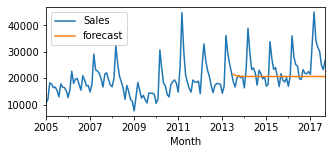

In [31]:
df['forecast']=model_fit_1.predict(start=102,end=153,dynamic=True)
arima_graph = df[['Sales','forecast']].plot(figsize=(5,2))

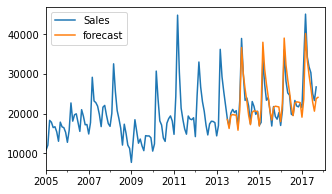

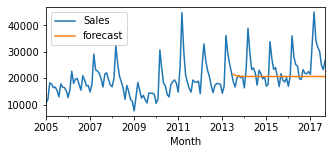

In [42]:
future_df['forecast'] = final_fitted.predict(start = 102, end = 153, dynamic= True)  
sarima_graph = future_df[['Sales', 'forecast']].plot(figsize=(5, 3)) 
df['forecast']=model_fit_1.predict(start=102,end=153,dynamic=True)
arima_graph = df[['Sales','forecast']].plot(figsize=(5,2))

In [103]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,7)]

In [104]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df.tail()

,Sales,Seasonal First Difference,forecast
2017-11-01,NaN,NaN,NaN
2017-12-01,NaN,NaN,NaN
2018-01-01,NaN,NaN,NaN
2018-02-01,NaN,NaN,NaN
2018-03-01,NaN,NaN,NaN


In [105]:
future_df=pd.concat([df,future_datest_df])

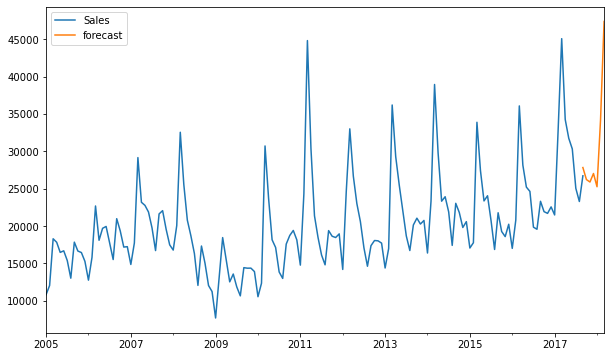

In [106]:
future_df['forecast'] = final_fitted.predict(start = 152, end = 159, dynamic= True)  
sarima_graph = future_df[['Sales', 'forecast']].plot(figsize=(10, 6)) 

In [107]:
future_df.tail(6)

,Sales,Seasonal First Difference,forecast
2017-10-01,NaN,NaN,26218.201970
2017-11-01,NaN,NaN,25890.088686
2017-12-01,NaN,NaN,27029.901330
2018-01-01,NaN,NaN,25257.876378
2018-02-01,NaN,NaN,34206.641346
2018-03-01,NaN,NaN,47359.718327


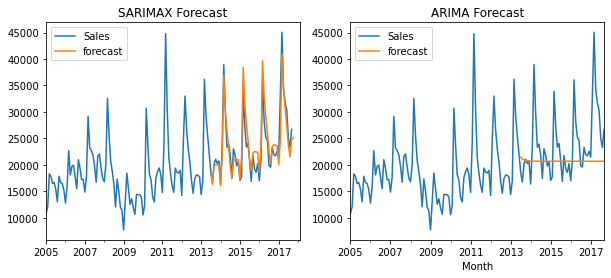

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

# Plot the SARIMAX forecast on the first subplot
future_df['forecast'] = final_fitted.predict(start=102, end=153, dynamic=True)
sarimax_graph = future_df[['Sales', 'forecast']].plot(ax=ax1, figsize=(10, 4))
sarimax_graph.set_title('SARIMAX Forecast')

# Plot the ARIMA forecast on the second subplot
df['forecast'] = model_fit_1.predict(start=102, end=153, dynamic=True)
arima_graph = df[['Sales', 'forecast']].plot(ax=ax2, figsize=(10, 4))
arima_graph.set_title('ARIMA Forecast')

# Display the figure
plt.show()